In [41]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./exams.csv");


In [42]:
# create another column that sums all of the scores and name it total
df["total"] = df["math score"] + df["writing score"] + df["reading score"]

# rename columns for coding simplicity
rename_columns = {
    "race/ethnicity": "race_ethnicity",
    "parental level of education": "parent_education",
    "test preparation course": "test_prep_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
}

df.rename(columns = rename_columns, inplace=True)

df.head()

,gender,race_ethnicity,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score,total
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219


In [43]:
# Function that generates mapping to have the columns into discrete number
# have to convert them to numbers to have correlation calculated
def generate_mapping(arr):
    dict = {}

    for i in range(len(arr)):
        dict[arr[i]] = i

    return dict

mappings = []
# generate map for non integer columns into dicrete values to calculate correlation between the values
genders = sorted(df.gender.unique())
gender_mapping = generate_mapping(genders)
mappings.append(gender_mapping)
print(gender_mapping)

race_ethnicity = sorted(df.race_ethnicity.unique())
race_ethnicity_mapping = generate_mapping(race_ethnicity)
mappings.append(race_ethnicity_mapping)
print(race_ethnicity_mapping)

parent_education = sorted(df.parent_education.unique())
parent_education_mapping = generate_mapping(parent_education)
mappings.append(parent_education_mapping)
print(parent_education_mapping)

lunch = sorted(df.lunch.unique())
lunch_mapping = generate_mapping(lunch)
mappings.append(lunch_mapping)
print(lunch_mapping)

test_prep_course = sorted(df.test_prep_course.unique())
test_prep_course_mapping = generate_mapping(test_prep_course)
mappings.append(test_prep_course_mapping)
print(test_prep_course_mapping)

{'female': 0, 'male': 1}
{'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
{"associate's degree": 0, "bachelor's degree": 1, 'high school': 2, "master's degree": 3, 'some college': 4, 'some high school': 5}
{'free/reduced': 0, 'standard': 1}
{'completed': 0, 'none': 1}


In [44]:
# apply mappings to necessary columns
without_score = df.columns[:5].tolist()

# map using the map values 
for i in range(len(without_score)):
    df[without_score[i]] = df[without_score[i]].map(mappings[i])

df.head()

,gender,race_ethnicity,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score,total
0,1,0,2,1,0,67,67,63,197
1,0,3,5,0,1,40,59,55,154
2,1,4,4,0,1,59,60,50,169
3,1,1,2,1,1,77,78,68,223
4,1,4,0,1,0,78,73,68,219


In [45]:
# check the correlation between the columns and sort by the absolute(correlation) for the total with other columns
df.corr().sort_values(by=['total'], key= lambda n : np.abs(n))

,gender,race_ethnicity,parent_education,lunch,test_prep_course,math_score,reading_score,writing_score,total
gender,1.000000,0.063231,-0.078676,-0.033962,-0.007653,0.200863,-0.189389,-0.246089,-0.081218
race_ethnicity,0.063231,1.000000,-0.011034,-0.033335,0.029828,0.213156,0.131459,0.133955,0.167890
parent_education,-0.078676,-0.011034,1.000000,-0.033616,0.008912,-0.187776,-0.148998,-0.161748,-0.174806
test_prep_course,-0.007653,0.029828,0.008912,-0.029267,1.000000,-0.151704,-0.245144,-0.315601,-0.249711
lunch,-0.033962,-0.033335,-0.033616,1.000000,-0.029267,0.374431,0.288282,0.319191,0.344386
math_score,0.200863,0.213156,-0.187776,0.374431,-0.151704,1.000000,0.819398,0.805944,0.919834
writing_score,-0.246089,0.133955,-0.161748,0.319191,-0.315601,0.805944,0.954274,1.000000,0.966367
reading_score,-0.189389,0.131459,-0.148998,0.288282,-0.245144,0.819398,1.000000,0.954274,0.970219
total,-0.081218,0.167890,-0.174806,0.344386,-0.249711,0.919834,0.970219,0.966367,1.000000


Since gender has the least significant correlation with the total score <br>
and math_score, writing_score, and reading_score has high positive correlation with total <br>
I will use the column total along with race_ethinicity, parent_education, test_prep_course, and lunch to <br>
find the associative pattern <br>

In [46]:
# filter out the columns that I will be using
filtered = df[["race_ethnicity", "parent_education", "lunch", "test_prep_course", "total"]]

filtered.corr().sort_values(by=['total'], key= lambda n : np.abs(n))

,race_ethnicity,parent_education,lunch,test_prep_course,total
race_ethnicity,1.000000,-0.011034,-0.033335,0.029828,0.167890
parent_education,-0.011034,1.000000,-0.033616,0.008912,-0.174806
test_prep_course,0.029828,0.008912,-0.029267,1.000000,-0.249711
lunch,-0.033335,-0.033616,1.000000,-0.029267,0.344386
total,0.167890,-0.174806,0.344386,-0.249711,1.000000


In [47]:
# trying to discretize the total column since it has 194 different values
# discretizing will help reduce the number of permutations when calculating the interestingness and mutual information
def discretize(dict, keys):
    total = len(dict)
    # threshold to stop merging the columns
    # if we start seeing sharp increase in the entropy difference that passes the threshold
    # we will stop merging the numbers
    # The graph is displayed below and it shows sharp increase passing around 0.17
    # so I set the threshold to be 0.17
    threshold = 0.17
    values = keys
    # to keep track of entropies to calculate the changes in the entropy
    entropy = []
    entropy.append(calc_entropy(values, dict, total))
    # to keep track of deltas to calculate the changes in the deltas to check where to stop
    deltas = []
    delta_changes = []

    curr_round = 0

    while len(dict) > 1:
        merge(values, dict)
        # sort again since numbers have to be in order to discretize
        dict = dict.sort_index()
        values = dict.keys()

        entropy.append(calc_entropy(values, dict, total))

        if curr_round > 0:
            delta = entropy[curr_round - 1] - entropy[curr_round]
            deltas.append(delta)

        if curr_round > 1:
            # if we see sharp increase that goes beyond the set threshold, we stop
            if len(delta_changes) > 0 and delta_changes[len(delta_changes) - 1] > threshold:
                print(delta_changes[len(delta_changes) - 1])
                break
            delta_change = deltas[curr_round - 1] - deltas[curr_round - 2]
            delta_changes.append(delta_change)
            

        curr_round += 1

    graph_plot = [a for a in delta_changes if a > 0]
    plt.figure(1)
    plt.title("Delta Change Graph")
    plt.plot(graph_plot)
    plt.ylabel("Delta Change")
    plt.xlabel("Positive changes")

    plt.figure(2)
    plt.title("Delta Change Graph")
    plt.plot(delta_changes)
    plt.ylabel("Delta Change")
    plt.xlabel("All Iterations")

    return values


# calculating shannon entropy
def calc_entropy(values, dict, total):
    total_entropy = 0

    for i in range(len(values)):
        prob = dict[values[i]] / total

        total_entropy += prob * np.log2(1 / prob)

    return total_entropy

# going through the values to calculate the min different
# and merge the two
def merge(keys, dict):
    diff_arr = []
    curr_min = 1e9
    min_idx = 0
    diff = 0

    for i in range(len(keys) - 1):
        val1, val2 = keys[i], keys[i + 1]

        diff = val2 - val1

        diff_arr.append(diff)
        if diff < curr_min:
            curr_min = diff
            min_idx = i

    val1, val2 = keys[min_idx], keys[min_idx + 1]
    weight1, weight2 = dict[val1], dict[val2]
    total_count = weight1 + weight2

    # using weighted calculation
    merged_key = (weight1 * val1 + weight2 * val2) / total_count
    dict.pop(val1)
    dict.pop(val2)


    dict[merged_key] = total_count

    return

### Testing discretization with test set

Float64Index([7.459625], dtype='float64')

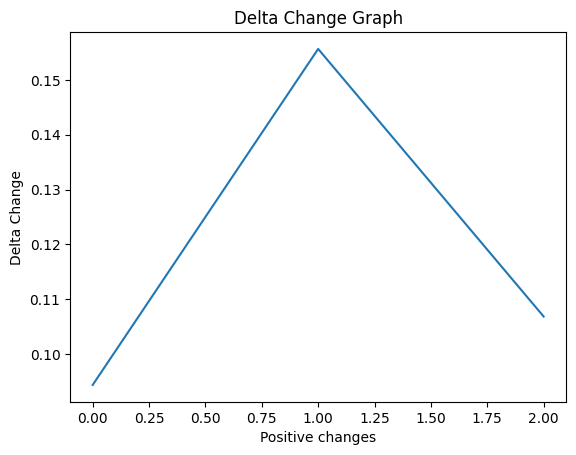

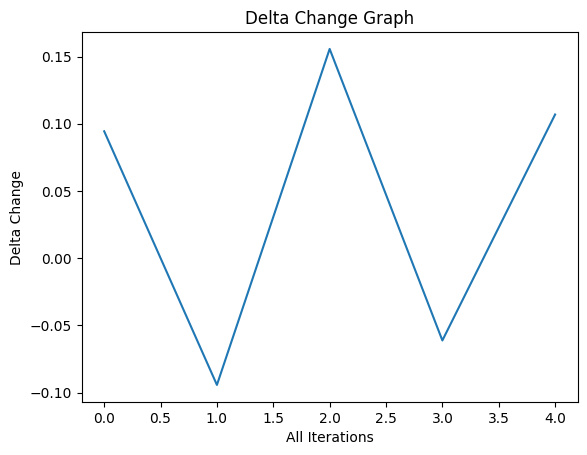

In [48]:
# testing to see if merging works fine with known dataset
test = [
    4.621,
    5.393,
    6.115,
    7.797,
    8.401,
    8.622,
    8.76,
    9.968,
]
test_df = pd.DataFrame(test, columns=["test"])

test_dict = test_df.test.value_counts()
test_dict = test_dict.sort_index()

test_keys = test_dict.keys()

discretize(test_dict, test_keys)

0.17504204134038304


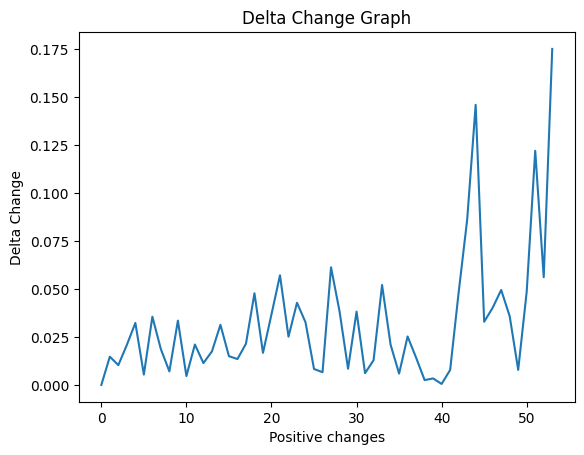

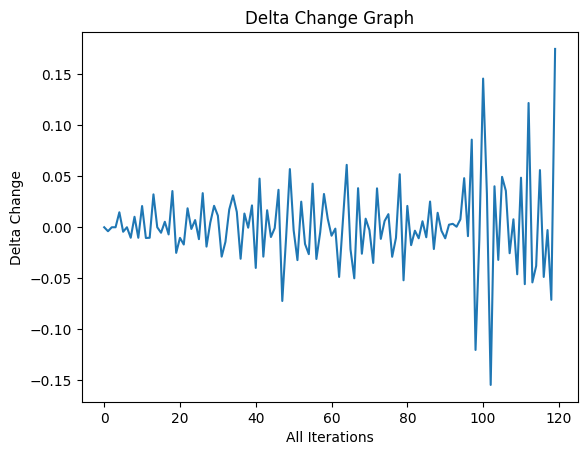

In [49]:
# get hashmap that points to the total counts
dict = filtered.total.value_counts()
dict = dict.sort_index()

keys = dict.keys()

# get the cut points from discretizing
cut_points = discretize(dict, keys)

In [50]:
# to use the existing mappings from pandas
# we need to insert 0 to the beginning of the array
cut_points = cut_points.insert(0, 0.0)

# if the last element in the cut_points is not 300, append 
max_from_total = df.total.max()

if (cut_points[len(cut_points) - 1]) != max_from_total:
    cut_points.append(max_from_total)

# for later use to reverse map discretized values to ranges
discretized_points_reverse_mapping = {}

# numbers that wil be used to discretize the total score
labels = []
for i in range(len(cut_points) - 1):
    labels.append(i)
    
    # adding discretized number => range mapping
    discretized_points_reverse_mapping[i] = "( " + str(round(cut_points[i], 2)) + "," + str(round(cut_points[i + 1], 2)) + " ]"

# apply discretization
df["discretized_total"] = pd.cut(df["total"], bins=cut_points, labels=labels)

filtered = df[["race_ethnicity", "parent_education", "lunch", "test_prep_course", "total"]]

# check the correlation again to see which columns to use first
filtered.corr().sort_values(by=['total'], key= lambda n : np.abs(n))

,race_ethnicity,parent_education,lunch,test_prep_course,total
race_ethnicity,1.000000,-0.011034,-0.033335,0.029828,0.167890
parent_education,-0.011034,1.000000,-0.033616,0.008912,-0.174806
test_prep_course,0.029828,0.008912,-0.029267,1.000000,-0.249711
lunch,-0.033335,-0.033616,1.000000,-0.029267,0.344386
total,0.167890,-0.174806,0.344386,-0.249711,1.000000


Since the correlation between lunch and total is the most significant <br>
I will start to analyze the statistical significant of association pattern between the two first

In [51]:
# function to calculate the significance of given dataset. Takes in various numbers of columns
def significance(
    order,
    subset,
    original_dataframe: pd.DataFrame,
    permuted_dataframe,
    size: int,
    threshold: float,
):
    # keys are list of distinct permutation of tuples that exist in the database
    keys = permuted_dataframe.keys()
    # create a new data frame to append the results
    results = pd.DataFrame(
        columns=(keys.names + ["MI", "Interestingness", "Significance"])
    )
    # max entropy of the dataset
    max_entropy = calc_max_entropy(original_dataframe, subset)
    expected_entropy = calc_expected_entropy(permuted_dataframe, keys)

    for tuple in keys:
        to_append = tuple
        prob = permuted_dataframe[tuple]

        # if the probability is already less than the threshold
        # we do not have to calculate the rest since it is already not significant
        if prob < threshold:
            res_tuple = to_append + (0, 0, "No")
            results.loc[len(results)] = res_tuple
            continue

        # expected entropy used to calculate the interestingness
        # to calculate the probability in the form of Pr(x1: 0) * Pr(x2:0) * ...
        indiv_prob = calc_indiv_prob(original_dataframe, subset, tuple)

        # mutual information
        mutual_information = calc_mutual_information(prob, indiv_prob)

        # if mutual information is negative, we know that it is already less than the interestingness
        # so continue
        if mutual_information < 0:
            res_tuple = to_append + (mutual_information, 0, "No")
            results.loc[len(results)] = res_tuple
            continue

        # calculating the interestingness
        interestingness = calc_interstingness(
            size, max_entropy, expected_entropy, prob, order, indiv_prob
        )

        # Append appropriate fields to the result dataset
        if mutual_information > interestingness:
            res_tuple = to_append + (mutual_information, interestingness, "Yes")
            results.loc[len(results)] = res_tuple
        else:
            res_tuple = to_append + (mutual_information, interestingness, "No")
            results.loc[len(results)] = res_tuple

    return results


# function to calculate the interestingness
def calc_interstingness(size, max_entropy, expected_entropy, prob, order, indiv_prob):
    oi = size * prob
    ei = size * indiv_prob
    entropy_ratio = expected_entropy / max_entropy

    chi_squared = np.square(oi - ei) / ei

    return (1 / prob) * np.power(
        (chi_squared / (2 * size)), np.power(entropy_ratio, (order / 2))
    )


# calcuating the mutual information
def calc_mutual_information(prob, indiv_prob):
    return np.log2(prob / indiv_prob)


# calculating the individual probabilities
def calc_indiv_prob(original_dataframe, subset, tuple):
    prob = 1

    for i in range(len(subset)):
        sub = subset[i]
        val = tuple[i]
        # using the built in functin to get the probability of occurence of the necessary data
        prob_dict = original_dataframe.value_counts(subset=[sub], normalize=True)
        prob *= prob_dict[val]

    return prob


# function to calculate the max entropy from the original dataframe filtered by the necessary columns
def calc_max_entropy(original_dataframe, subset):
    return np.log2(original_dataframe[subset].nunique().prod())


# function to calculate the expected entropy
def calc_expected_entropy(permuted_dataframe, keys):
    sum_entropy = 0

    for k in keys:
        prob = permuted_dataframe[k]

        sum_entropy += prob * np.log2(1 / prob)

    return sum_entropy


In [52]:
# function to get reverse map
def reverse_mapping(map):
    dict = {}

    for key in map:
        dict[map[key]] = key

    return dict

reverse_mappings = []

to_map = mappings[1:]

for i in range(len(to_map)):
    dict = reverse_mapping(to_map[i])
    reverse_mappings.append(dict)

print(reverse_mappings)

[{0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}, {0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}, {0: 'free/reduced', 1: 'standard'}, {0: 'completed', 1: 'none'}]


In [53]:
# get possible permutations from the dataframe, we don't have to account for permuations that do not exist
# normailzed returns percentage of counts of possible tuples

# I will count the unique permuations of all elements and use it to calculate the threshold
# if the dataset are i.i.d, threshold will be just 1 / number of rows in dataset
size = len(df.value_counts(subset=["race_ethnicity","parent_education","test_prep_course","lunch", "discretized_total"]))
subset = ["lunch", "discretized_total"]
order_two = df.value_counts(subset=subset, normalize=True)

threshold = 1 / size

order_two_result = significance(2, subset, df, order_two, size, threshold)
order_two_result["lunch"] = order_two_result["lunch"].map(reverse_mappings[2])
order_two_result["discretized_total"] = order_two_result["discretized_total"].map(discretized_points_reverse_mapping)


order_two_result.to_excel("./order_two.xlsx" , sheet_name="order_two")
order_two_result.head(20)


,lunch,discretized_total,MI,Interestingness,Significance
0,standard,"( 236.84,239.41 ]",0.202019,0.018755,Yes
1,standard,"( 218.9,222.42 ]",0.247822,0.027365,Yes
2,standard,"( 222.42,226.59 ]",0.295128,0.037808,Yes
3,standard,"( 226.59,229.61 ]",0.440178,0.079629,Yes
4,standard,"( 208.45,212.64 ]",-0.010975,0.000000,No
5,standard,"( 215.71,218.9 ]",0.424411,0.074935,Yes
6,standard,"( 242.74,246.64 ]",0.184097,0.016021,Yes
7,standard,"( 166.67,170.26 ]",0.032094,0.000637,Yes
8,standard,"( 194.59,197.5 ]",0.007003,0.000039,Yes
9,standard,"( 204.4,208.45 ]",0.007003,0.000039,Yes


In [54]:
subset = ["test_prep_course","lunch", "discretized_total"]
order_three = df.value_counts(subset=subset, normalize=True)

order_three_result = significance(3, subset,df, order_three, size, threshold)
order_three_result["lunch"] = order_three_result["lunch"].map(reverse_mappings[2])
order_three_result["test_prep_course"] = order_three_result["test_prep_course"].map(reverse_mappings[3])
order_three_result["discretized_total"] = order_three_result["discretized_total"].map(discretized_points_reverse_mapping)


order_three_result.to_excel("./order_three.xlsx", sheet_name="order_three")
order_three_result.head(20)

,test_prep_course,lunch,discretized_total,MI,Interestingness,Significance
0,none,standard,"( 208.45,212.64 ]",0.366095,0.090981,Yes
1,none,standard,"( 166.67,170.26 ]",0.386202,0.101363,Yes
2,none,standard,"( 226.59,229.61 ]",0.505190,0.162861,Yes
3,none,standard,"( 236.84,239.41 ]",0.205630,0.034437,Yes
4,none,standard,"( 215.71,218.9 ]",0.527558,0.177195,Yes
5,none,standard,"( 204.4,208.45 ]",0.254539,0.050201,Yes
6,none,standard,"( 222.42,226.59 ]",0.205630,0.034749,Yes
7,none,standard,"( 218.9,222.42 ]",0.058788,0.004064,Yes
8,none,standard,"( 201.48,204.4 ]",0.489423,0.157035,Yes
9,none,standard,"( 242.74,246.64 ]",0.151182,0.020869,Yes


In [55]:
subset = ["parent_education","test_prep_course","lunch", "discretized_total"]
order_four = df.value_counts(subset=subset, normalize=True)

order_four_result = significance(4, subset,df, order_four, size, threshold)
order_four_result["lunch"] = order_four_result["lunch"].map(reverse_mappings[2])
order_four_result["test_prep_course"] = order_four_result["test_prep_course"].map(reverse_mappings[3])
order_four_result["parent_education"] = order_four_result["parent_education"].map(reverse_mappings[1])
order_four_result["discretized_total"] = order_four_result["discretized_total"].map(discretized_points_reverse_mapping)


order_four_result.to_excel("./order_four.xlsx", sheet_name="order_four")
order_four_result.head(20)

,parent_education,test_prep_course,lunch,discretized_total,MI,Interestingness,Significance
0,high school,none,standard,"( 201.48,204.4 ]",1.796996,3.796175,No
1,associate's degree,none,standard,"( 236.84,239.41 ]",1.313433,2.327679,No
2,some high school,none,standard,"( 204.4,208.45 ]",1.320967,2.454265,No
3,associate's degree,none,standard,"( 189.46,191.39 ]",1.769113,3.869657,No
4,some college,none,standard,"( 218.9,222.42 ]",0.744730,1.104332,No
5,some high school,none,standard,"( 208.45,212.64 ]",0.828451,1.290335,No
6,some college,none,standard,"( 236.84,239.41 ]",0.698926,1.006866,No
7,high school,none,standard,"( 226.59,229.61 ]",1.134691,2.055445,No
8,high school,none,standard,"( 208.45,212.64 ]",0.747668,1.110688,No
9,high school,none,standard,"( 204.4,208.45 ]",0.977150,1.645305,No


In [56]:
subset = ["race_ethnicity","parent_education","test_prep_course","lunch", "discretized_total"]
order_five = df.value_counts(subset=subset, normalize=True)

order_five_result = significance(5, subset,df, order_five, size, threshold)
order_five_result["lunch"] = order_five_result["lunch"].map(reverse_mappings[2])
order_five_result["test_prep_course"] = order_five_result["test_prep_course"].map(reverse_mappings[3])
order_five_result["parent_education"] = order_five_result["parent_education"].map(reverse_mappings[1])
order_five_result["race_ethnicity"] = order_five_result["race_ethnicity"].map(reverse_mappings[0])
order_five_result["discretized_total"] = order_five_result["discretized_total"].map(discretized_points_reverse_mapping)

order_five_result.to_excel("./order_five.xlsx", sheet_name="order_five")
order_five_result.head(20)

,race_ethnicity,parent_education,test_prep_course,lunch,discretized_total,MI,Interestingness,Significance
0,group D,high school,none,standard,"( 226.59,229.61 ]",3.067052,28.386203,No
1,group C,some college,none,standard,"( 218.9,222.42 ]",2.053196,19.873174,No
2,group B,associate's degree,completed,standard,"( 183.59,186.62 ]",3.559183,45.272983,No
3,group C,some high school,none,standard,"( 204.4,208.45 ]",1.951361,21.867366,No
4,group C,associate's degree,none,standard,"( 226.59,229.61 ]",2.020995,22.721685,No
5,group B,high school,none,free/reduced,"( 183.59,186.62 ]",3.482899,43.941891,No
6,group B,some college,completed,free/reduced,"( 183.59,186.62 ]",4.335888,60.566857,No
7,group C,bachelor's degree,none,standard,"( 166.67,170.26 ]",2.672525,31.304359,No
8,group A,some college,completed,standard,"( 229.61,231.68 ]",5.525695,92.013468,No
9,group D,some high school,none,standard,"( 176.68,179.5 ]",2.253328,25.652720,No
